In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Maternal Health.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
df.isnull()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [10]:
df.shape

(1014, 7)

In [11]:
df.size

7098

In [12]:
df.columns=df.columns.str.strip()
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [14]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

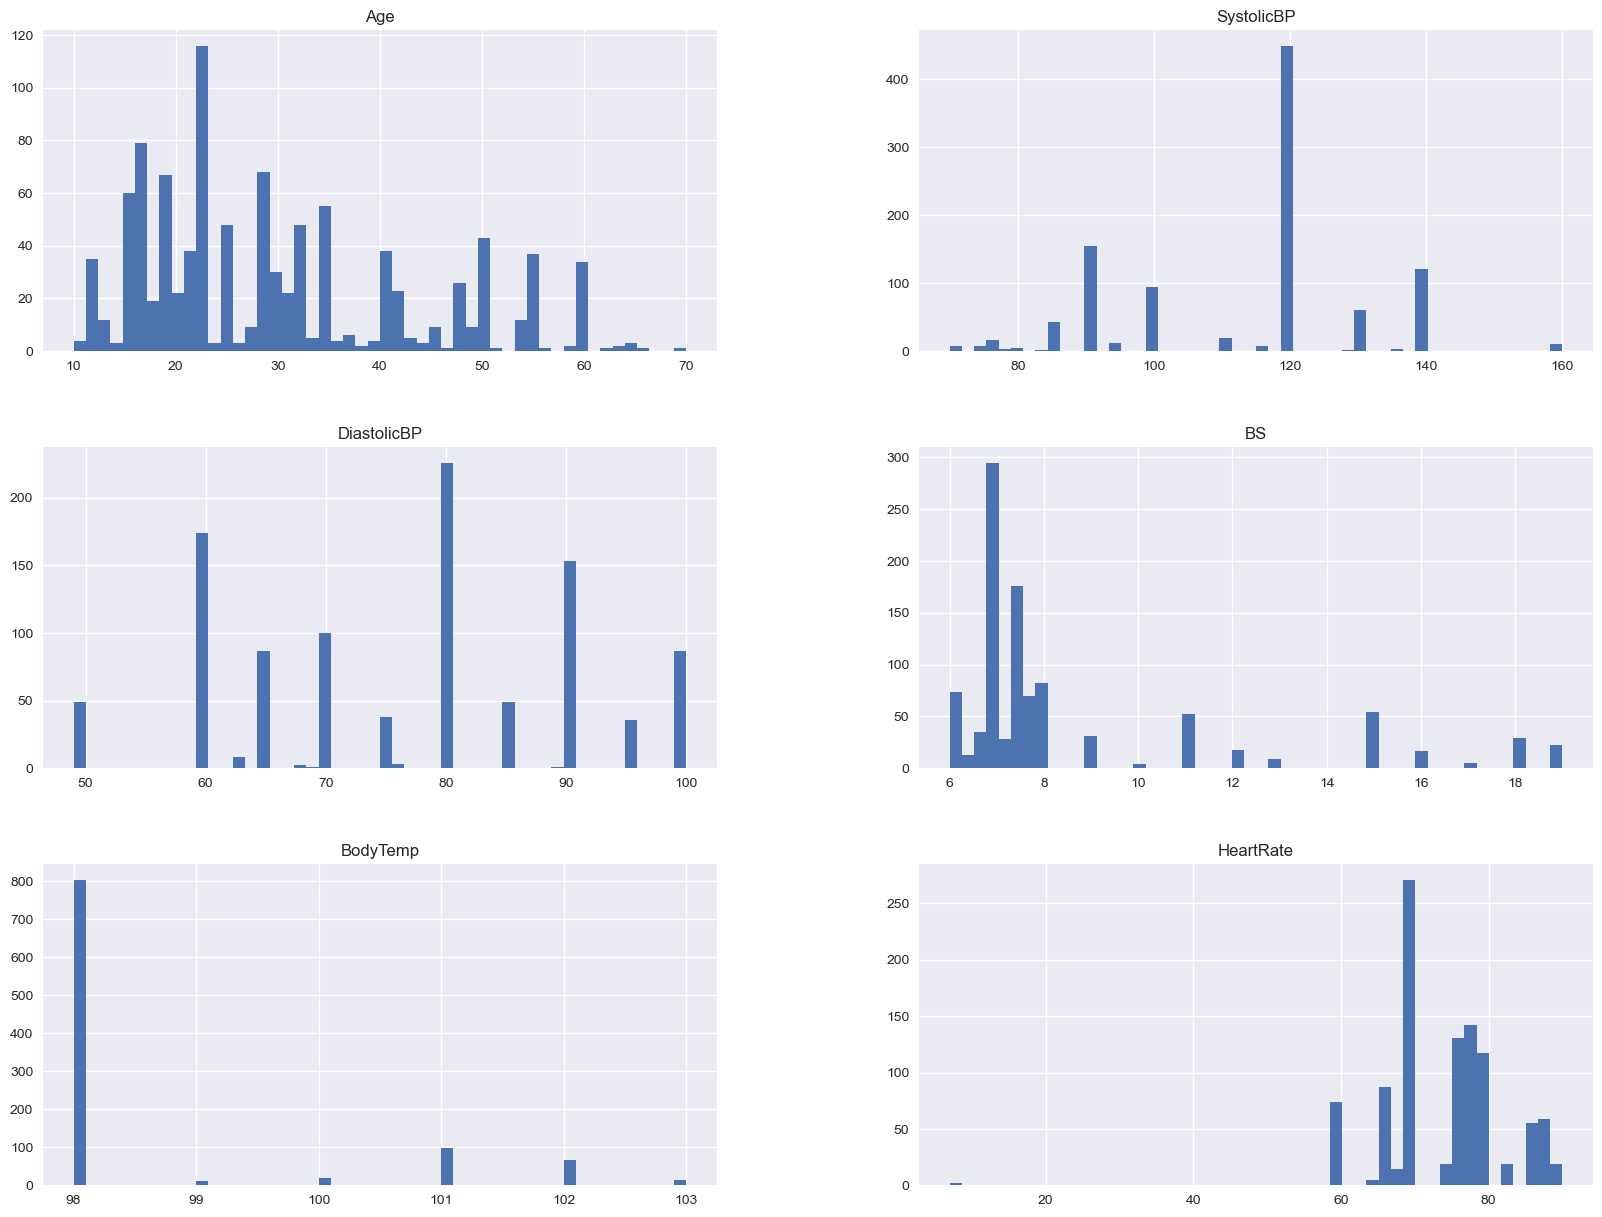

In [16]:
## Plot desnity plot for all features
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [20]:
## Percentage for Pie Chart
percentage=df['RiskLevel'].value_counts(normalize=True)*100

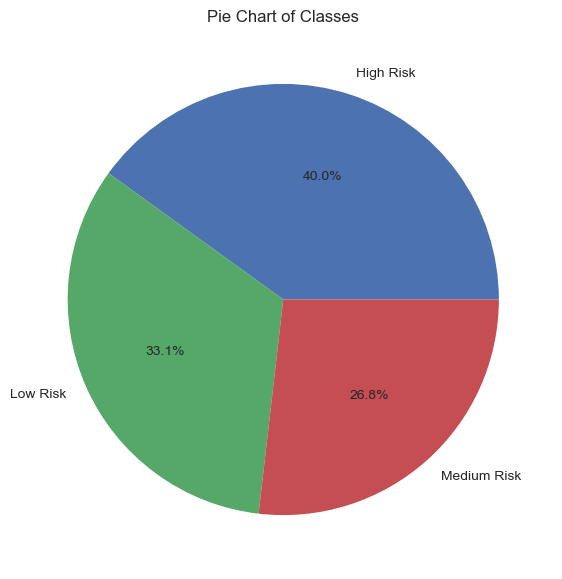

In [21]:
# plotting piechart
classlabels=["High Risk","Low Risk", "Medium Risk"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [22]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [24]:
import seaborn as sns

<AxesSubplot:>

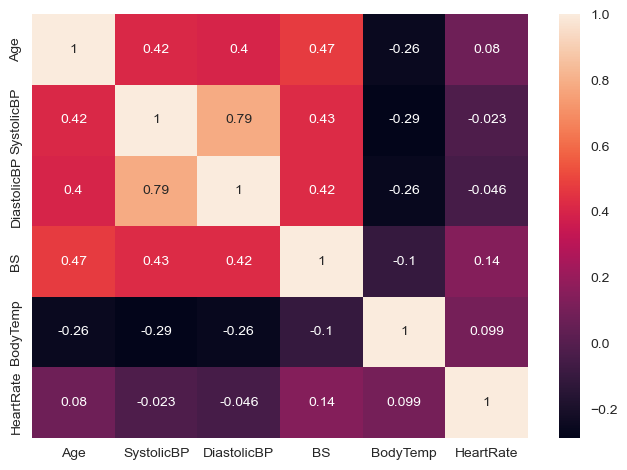

In [25]:
sns.heatmap(df.corr(),annot=True)

In [31]:
data['risk_numeric'] = np.where(data['RiskLevel'] == 'high risk', 2,
                                np.where(data['RiskLevel'] == 'low risk', 0,
                                         np.where(data['RiskLevel'] == 'mid risk', 1, np.nan)))

In [34]:
data['risk_numeric'].value_counts()

0.0    406
1.0    336
2.0    272
Name: risk_numeric, dtype: int64

In [36]:
df = pd.DataFrame(data)

In [37]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,risk_numeric
0,25,130,80,15.0,98.0,86,high risk,2.0
1,35,140,90,13.0,98.0,70,high risk,2.0
2,29,90,70,8.0,100.0,80,high risk,2.0
3,30,140,85,7.0,98.0,70,high risk,2.0
4,35,120,60,6.1,98.0,76,low risk,0.0


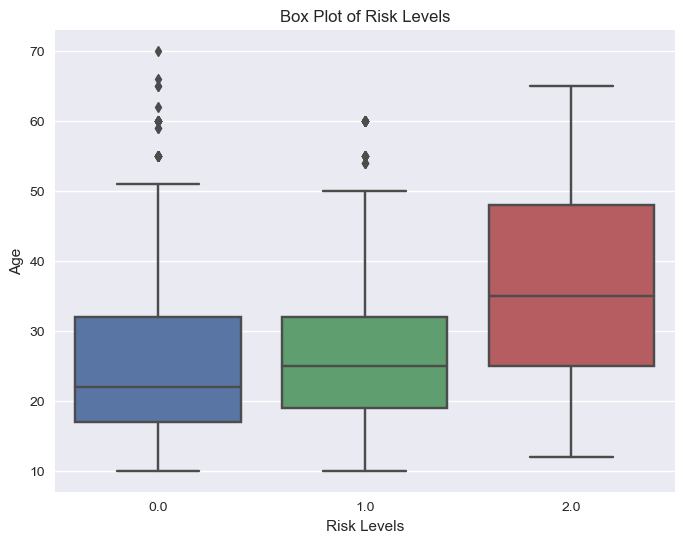

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='risk_numeric', y='Age', data=data)  # Replace 'YourOtherVariable' with the variable you want to compare
plt.title('Box Plot of Risk Levels')
plt.xlabel('Risk Levels')
plt.ylabel('Age')
plt.show()

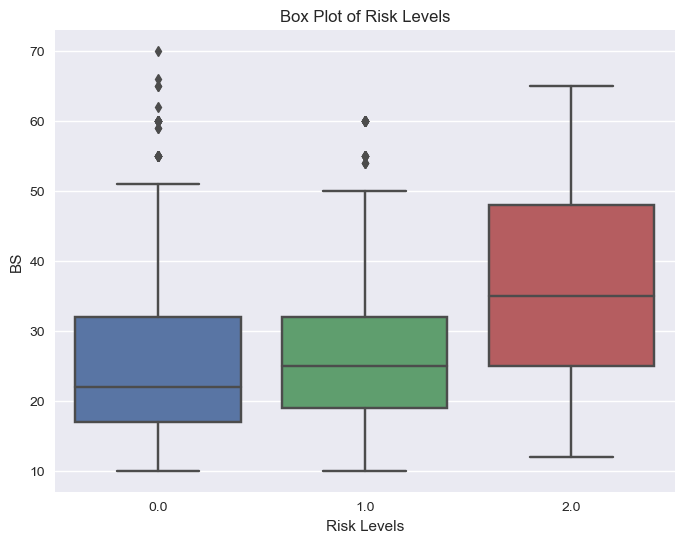

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='risk_numeric', y='Age', data=data)  # Replace 'YourOtherVariable' with the variable you want to compare
plt.title('Box Plot of Risk Levels')
plt.xlabel('Risk Levels')
plt.ylabel('BS')
plt.show()

In [56]:
## Independent And dependent features
X=df.drop('risk_numeric',axis=1)
y=df['risk_numeric']

In [57]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
X_train.shape,X_test.shape

((760, 7), (254, 7))

In [59]:
## Feature Selection based on correlaltion
X_train.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.451639,0.430685,0.496242,-0.250828,0.078274
SystolicBP,0.451639,1.000000,0.794872,0.437631,-0.310238,-0.009029
DiastolicBP,0.430685,0.794872,1.000000,0.440664,-0.291830,-0.051598
BS,0.496242,0.437631,0.440664,1.000000,-0.110951,0.178318
BodyTemp,-0.250828,-0.310238,-0.291830,-0.110951,1.000000,0.115820
HeartRate,0.078274,-0.009029,-0.051598,0.178318,0.115820,1.000000


<AxesSubplot:>

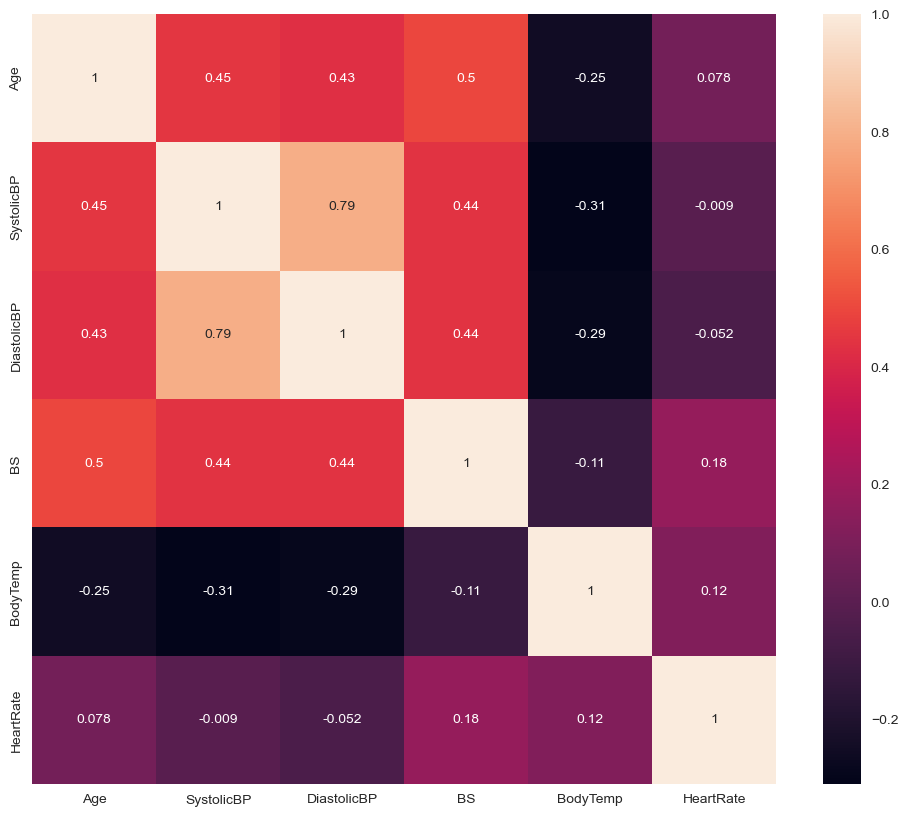

In [60]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [61]:
X_train.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.451639,0.430685,0.496242,-0.250828,0.078274
SystolicBP,0.451639,1.000000,0.794872,0.437631,-0.310238,-0.009029
DiastolicBP,0.430685,0.794872,1.000000,0.440664,-0.291830,-0.051598
BS,0.496242,0.437631,0.440664,1.000000,-0.110951,0.178318
BodyTemp,-0.250828,-0.310238,-0.291830,-0.110951,1.000000,0.115820
HeartRate,0.078274,-0.009029,-0.051598,0.178318,0.115820,1.000000


In [62]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [63]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [64]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((760, 7), (254, 7))

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

ValueError: could not convert string to float: 'high risk'

Text(0.5, 1.0, 'X_train After Scaling')

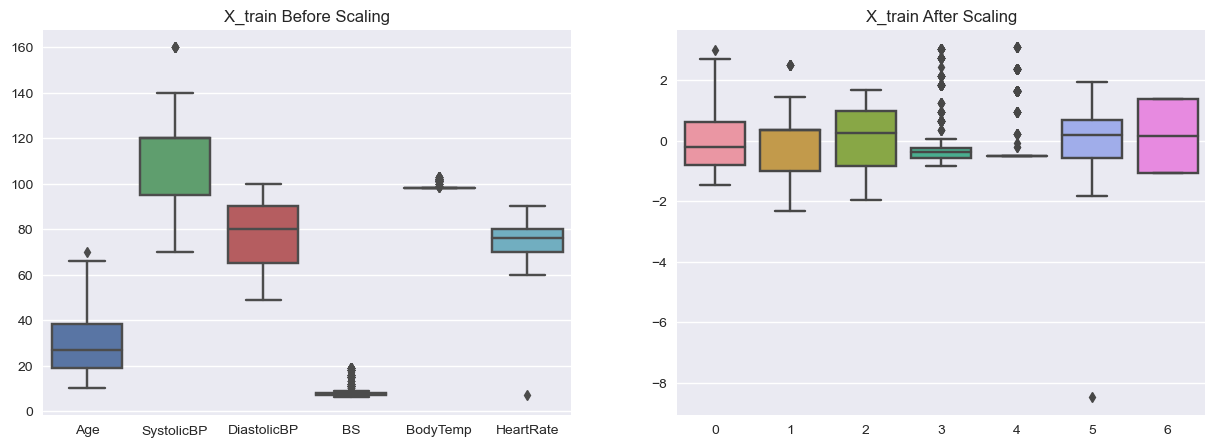

In [66]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 4.624472283674864e-16
R2 Score 1.0


In [76]:
#SO , BEST MODEL

# Lasso 

In [68]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6490364691255699
R2 Score -0.006066657647522344


# Ridge

In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.0011773353308117925
R2 Score 0.9999968164286664


In [72]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.4808152455390127
R2 Score 0.4478653346308088


In [73]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))